In [11]:
import tweepy # Helps in getting tweets 
from textblob import TextBlob # For getting tweet's subjectivity and polarity
from twython import Twython # Helps in getting tweets 
from wordcloud import WordCloud # Helps in forming a word cloud
import pandas as pd # Making and Manipulating a dataframe
import numpy as np # Helps in various vector and matrix calculations
import re # The Regex library
import matplotlib.pyplot as plt # For plotting various visualizations
from functools import reduce # An important method which will help in joining data frames
plt.style.use('fivethirtyeight')
import os # The os library to get current path and various other things
from PIL import Image # To get a mask for the word cloud


In [2]:
CONSUMER_KEY = "*********************" # Enter your CONSUMER KEY
CONSUMER_SECRET = "*****************************************" # Enter your CONSUMER SECRET KEY 
OAUTH_TOKEN = "**********************************" # Enter your OAUTH TOKEN KEY
OAUTH_TOKEN_SECRET = "***************************************" # Enter your OAUTH TOKEN SECRET KEY
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [3]:
df1 = pd.read_csv('phase1.csv',header=None) # Reading the IEEE file (which contains tweet id and polarity)
df1.rename(columns = {0:'tweet_id',1:'polarity'}, inplace=True)

In [4]:
# A function for fwtching tweets from tweet ids
def check_error(x):
    try:
        tweet = twitter.show_status(id=x)
        return tweet
    except Exception as e:
        return np.nan
    

df1['tweets'] = df1['tweet_id'].apply(lambda x : check_error(x))


In [5]:
# Making a copy of the dataframe
df = df1.copy()

In [6]:
#Removing Nulls
df.dropna(inplace=True)


In [7]:
temp = []

for i in df['tweets']:
    temp.append((i['text']))

df['tweet_text'] = pd.Series(temp)


df.head()


,tweet_id,polarity,tweets,tweet_text
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa..."
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,#liveleak More Cooties than #Corona? https://t...
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...


In [8]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', str(text)) #Removing @mentions
    text = re.sub('#', '', str(text)) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', str(text)) # Removing RT
    text = re.sub('https?:\/\/\S+', '', str(text)) # Removing hyperlink
 
    return text


# Clean the tweets
df['tweet_text'] = df['tweet_text'].apply(cleanTxt)



# Show the cleaned tweets
df.head()

df.dropna(inplace=True)


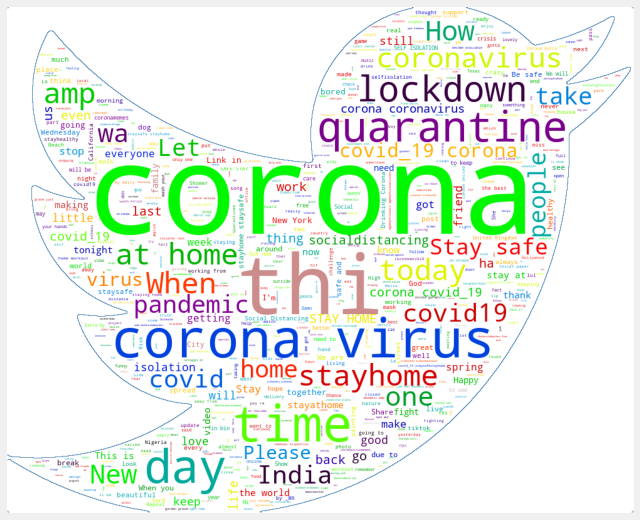

In [15]:
file = os.getcwd()
allWords = ' '.join([twts for twts in df['tweet_text']])

#We read the mask image into a numpy array
twitter_mask = np.array(Image.open(os.path.join(file, "twitter_mask.png")))
#We generate the wordcloud using the series created and the mask 
word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                       background_color="white", max_words=2000, mask=twitter_mask, 
                       contour_width=1, contour_color="steelblue", 
                       colormap="nipy_spectral").generate(allWords)

#Now we plot the figure
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation="hermite")
plt.axis("off")    
plt.show() 

In [16]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['tweet_text'].apply(getSubjectivity)
df['Polarity'] = df['tweet_text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'


In [17]:
# A function to get the sentiment of the people on the basis of the polarity
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head(10)


,tweet_id,polarity,tweets,tweet_text,Subjectivity,Polarity,Sentiment
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive
5,1242696110159822850,0.350000,{'created_at': 'Wed Mar 25 06:13:35 +0000 2020...,"Lockdown series, Day 1: ensuring safety\n\nThe...",0.550000,0.350000,Positive
6,1242696256398462976,0.600000,{'created_at': 'Wed Mar 25 06:14:10 +0000 2020...,"Hello Foodies, Lets check this amazing home ma...",0.900000,0.600000,Positive
7,1242697026451759104,-0.125000,{'created_at': 'Wed Mar 25 06:17:13 +0000 2020...,We support and recommend the Jantacurfew in or...,0.000000,0.000000,Neutral
8,1242697103954120704,0.000000,{'created_at': 'Wed Mar 25 06:17:32 +0000 2020...,Ghar par rehna hai to kuch acha to banana hi p...,0.000000,0.000000,Neutral
9,1242697353972285441,0.600000,{'created_at': 'Wed Mar 25 06:18:32 +0000 2020...,A nice neighborhood art project to keep us all...,1.000000,0.600000,Positive


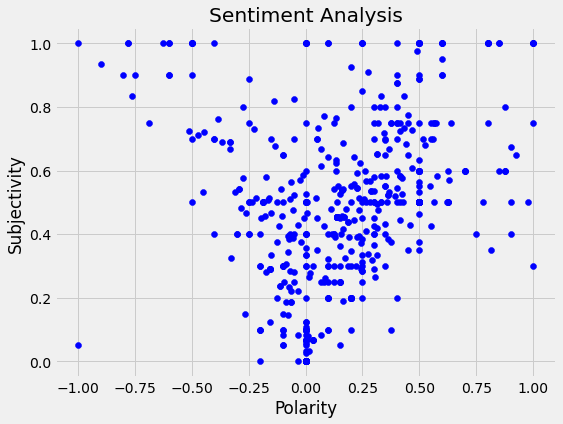

In [18]:
 # Plotting the polarity against subjectivity
plt.figure(figsize=(8,6)) 
for i in df.index:
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [19]:
# % of positive tweets
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['tweet_text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

39.6

In [20]:
# % of negative tweets
ntweets = df[df.Sentiment == 'Negative']
ntweets = ntweets['tweet_text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100 , 1)

15.4

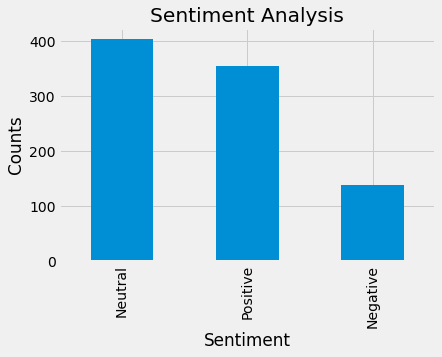

In [21]:
# Plotting the sentiment of the people
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            890, 891, 892, 893, 894, 895, 896, 897, 898, 899],
           dtype='int64', length=898)

In [23]:
# Getting user's location
loc = []
for i in df.index:
    loc.append(df['tweets'][i]['user']['location'])
df['location'] = pd.Series(loc)

In [24]:
df.index = range(len(df))

In [25]:
df.head()

,tweet_id,polarity,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI"
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska"
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa"
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY"


In [26]:
# Getting user's retweet count
ret = []
for i in df.index:
    ret.append(df['tweets'][i]['retweet_count'])
df['retweets'] = pd.Series(ret)

In [27]:
df.head()

,tweet_id,polarity,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0


In [28]:
# Setting a responde variable to null values
df['response'] = np.nan

In [29]:
df.head()

,tweet_id,polarity,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN


In [30]:
from datetime import datetime

# A function to convert our date in a standard format.
def get_date(tweets):
    y = tweets['created_at'][-4:] # YEAR
    m = tweets['created_at'][4:7]# MONTH
    d = tweets['created_at'][8:10] # DATE
    date1 =  d + ' ' + m + ' ' + y
    date2 = datetime.strptime(date1, '%d %b %Y').date()
    return date2.strftime('%Y-%m-%d')



In [31]:
df['date'] = df['tweets'].apply(get_date)

In [32]:
df['date'] = pd.to_datetime(df["date"])

In [33]:
type(df['date'])

pandas.core.series.Series

In [34]:
df.head()

,tweet_id,polarity,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,0.350000,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,-0.500000,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,0.500000,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,0.000000,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,0.244444,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


In [35]:
# Dropping polarity to avoid ambiguity b/w polarity and Polarity
df.drop('polarity',axis=1,inplace=True)

In [36]:
# Dropping all the null tweets.
df = df[df['tweet_text'] != 'nan']

In [37]:
# Storing data in  a csv for further usage.
data = df.to_csv('data1.csv')